**KNN**  - an algorithm which can be used for both classification and prediction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../sample_data/Classified_Data.csv')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


let's remove the first column and make it to index 

In [6]:
df = pd.read_csv('../sample_data/Classified_Data.csv',index_col = [0])
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


**Standard Scalar** - its part of scikit-learn's preprocessing module, which is used to standardize or normalize the data. standard scaling is applied if the data is disproportinate in the calculation or large variation in the number, as KNN is sensitive to data.

example:  Imagine you have two features for a house price prediction model: number_of_rooms (e.g., values from 1 to 10) and square_footage (e.g., values from 500 to 5000). If you feed these directly into many machine learning algorithms, the square_footage will have a much larger numerical range and might unfairly dominate the learning process, simply because its numbers are bigger.

StandardScaler transforms your data so that each feature (column) has:
A mean of 0
A standard deviation of 1
This process is also known as **Z-score normalization**. this is used with distance based algorithms like, KNN, K-means and SVM etc.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df.shape

(1000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [11]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape # looks like there is no change in the data

(1000, 11)

In [16]:
scalar = StandardScaler()
scalar.fit(df.drop("TARGET CLASS",axis = 1))

,copy,True
,with_mean,True
,with_std,True


In [17]:
scaled_features = scalar.transform(df.drop('TARGET CLASS',axis = 1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]], shape=(1000, 10))

In [20]:
df_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [21]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop('TARGET CLASS',axis =1)
y = df['TARGET CLASS']


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[150   9]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.93      0.91      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Now, Let's try to find the optimal value for n_neighbors.

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred))

**np.mean(pred_i != Y_TEST)** calculates the proportion of incorrect predictions (i.e., the misclassification rate or error rate) for the current K.

After the loop completes, the error_rate list will contain 39 values. error_rate[0] will be the error for K=1, error_rate[1] for K=2, and so on, up to error_rate[38] for K=39.

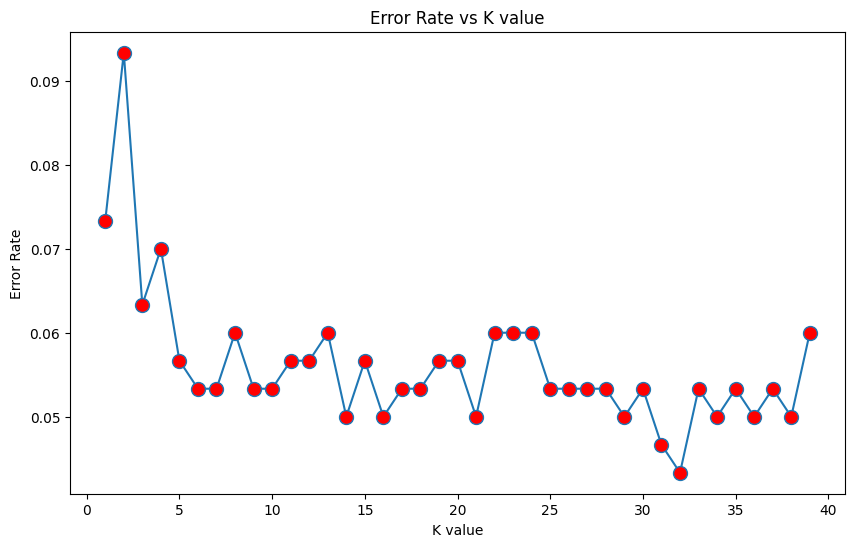

In [38]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,marker = 'o',markersize = 10,mfc = 'r')
plt.title('Error Rate vs K value')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.show()

let's take the median value here 17 so that it will not overfit or underfit

In [39]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[153   6]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.93      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



As you can see the accuracy has increased to 95% from 93%

KNN is a lazy learner, does not need to be trained upfront, but it will memorize all your data.

 KNN is often a great choice for a first-pass or baseline model. You can quickly get an idea of how well a "neighborhood-based" approach performs before moving on to more complex algorithms.

 use it for recommendation systems(recommend a movie that neighbors liked), image classifications, medical diagonisis etc